# Задача 7.1

In [2]:
import scipy.stats as sps
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Сгенерируем выборку из $N(0, 1)$:

In [3]:
n = 100
sample = sps.norm.rvs(size=n)

# Модель - $N(\theta, 1)$

Из задачи 8.4 домашнего задания оценка максимального правдоподобия для параметра $\theta$ - $\overline{X}$. Байесовская оценка, если априорное распределение - $N(a, \sigma^2)$, - $\frac{a + \sum_{i=1}^n X_i \cdot \sigma^2}{\sigma^2\cdot n + 1}$ (задача 8.3). 

Найдем оценку максимального правдоподобия для всех $n \leq 100$:

In [4]:
s = np.arange(1, n + 1, 1)
max_likelihood_est = sample.cumsum() / s

Для нескольких значений параметров сдвига и масштаба для априорного распределения найдём байесовскую оценку:

In [5]:
def bayesian_estimation(sample, a, sigma_2):
    s = np.arange(1, n + 1, 1)
    return (a + sample.cumsum() * sigma_2) / (1 + sigma_2 * s)

Истинное значение параметра $\theta$ - 0. Построим графики зависимости абсолютной величины отклонения оценки от истинного значения $\theta$ в зависимости от n для оценки максимального правдоподобия и байесовских оценок для разных значений параметров сдвига и масштаба априорного распределения:

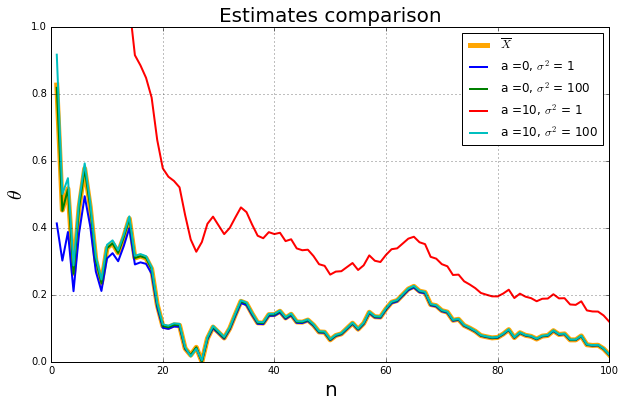

In [6]:
a = np.array([0, 0, 10, 10])
sigma_2 = np.array([1, 100, 1, 100])
colors = np.array(['blue', 'green', 'orange', 'yellow'])

plt.figure(figsize=(10, 6))
plt.plot(s, abs(max_likelihood_est), color = 'orange', linewidth=5, alpha=3,label=r'$\overline{X}$')
for i in range(4):
    plt.plot(s, abs(bayesian_estimation(sample, a[i], sigma_2[i])), linewidth=2, 
             label='a =' + str(a[i]) + r', $\sigma^2$ = ' + str(sigma_2[i]))

plt.legend()
plt.xlim((0, 100))
plt.ylim((0, 1))
plt.xlabel('n', fontsize = 20)
plt.ylabel(r'$\theta$', fontsize = 20)
plt.title('Estimates comparison', fontsize = 20)
plt.grid() 

Из графиков видно, что байесовские оценки с параметрами априорного распределения (0, 1), (0, 100), (10, 100) и оценка максимального правдоподобия дают примерно одинаковый результат при всех значениях n. Это можно объяснить тем, что априорное распределение - распределение параметра $\theta$, значит, оценка будет лучше, если вероятность попадания в окрестность истинного знаения наибольшая. Оценка с параметрами (10, 1) оценивает параметр менее точно, чем остальные оценки, так как для $N(10, 1)$ вероятность попадания в окрестность 0 - мала. 

# Модель - $N(0, \theta)$

Оценка максимального правдоподобия для $N(0, \theta)$ - $\overline{X^2}$:

In [7]:
max_likelihood_est_2 = (sample ** 2).cumsum() / (s)

Сопряжённое распределение для $N(0, \theta)$ - обратное гамма распределение с параметрами $\lambda$ и $\alpha$. Тогда байесовская оценка для $\theta$ - $\frac{2 \cdot \alpha + \sum_{i=1}^n X_i^2}{2 \cdot \lambda + n - 2}$

In [8]:
def bayesian_estimation_2(sample, _lambda, alpha):
    s = np.arange(1, n + 1, 1)
    return  (2 * alpha + (sample ** 2).cumsum()) / (2 * _lambda + s - 2)

Истинное значение параметра - 1. Построим графики зависимости отклонения оценки от истинного значения $\theta$ для разных значений $\lambda$ и $\alpha$:

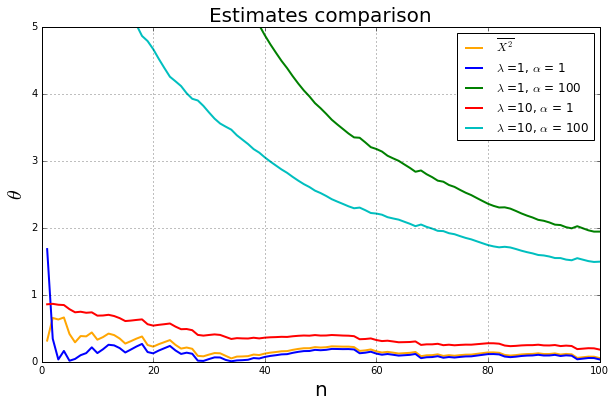

In [9]:
_lambda = np.array([1, 1, 10, 10])
alpha = np.array([1, 100, 1, 100])

plt.figure(figsize=(10, 6))
plt.plot(s, abs(max_likelihood_est_2 - 1), color = 'orange', linewidth=2, alpha=3,label=r'$\overline{X^2}$')
for i in range(4):
    plt.plot(s, abs(bayesian_estimation_2(sample, _lambda[i], alpha[i]) - 1), linewidth=2, 
             label=r'$\lambda$ =' + str(_lambda[i]) + r', $\alpha$ = ' + str(alpha[i]))

plt.legend()
plt.xlim((0, 100))
plt.ylim((0, 5))
plt.xlabel('n', fontsize = 20)
plt.ylabel(r'$\theta$', fontsize = 20)
plt.title('Estimates comparison', fontsize = 20)
plt.grid() 

Из графиков видно, что байесовские оценки с параметрами априорного распределения (10, 100) и (1, 100) оценивают $\theta$ хуже, чем с параметрами (1, 1), (10, 1) и оценка максимального правдоподобия. Смысл выбора параметров априорного распределения - как будто до начала эксперимента провели $2\lambda$ испытаний и получили сумму квадратов равную $2\alpha$. Так как истинное значение $\theta$ = 1, все значения в испытаниях до эксперимента должны были быть около нуля, а (10, 100) и (1, 100) дают значение квадрата Х - 10 и 100. 

Рассмотрим вероятность попадания в отрезок $[1-0.25,1 + 0.25]$ для обратного гамма распределения:

In [12]:
for i in range(4):
    print _lambda[i], alpha[i], (sps.invgamma.cdf(1.25, a=_lambda[i], scale=alpha[i]) - 
          sps.invgamma.cdf(0.75, a=_lambda[i], scale=alpha[i]))

1 1 0.185731826001
1 100 0.0
10 1 1.45129113727e-06
10 100 0.0


Заметим, что для параметров (1, 100) и (10, 100) вероятность попадания в отрезок наименьшая, значит оценки получаются хуже.